In [1]:
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import display,Image, Latex
from __future__ import division
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

import time

from IPython.display import display,Image, Latex

from IPython.display import clear_output

#import SchemDraw as schem
#import SchemDraw.elements as e

import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc

import sympy as sym

from IPython.core.display import HTML
def header(text):
    raw_html = '<h4>' + str(text) + '</h4>'
    return raw_html

def box(text):
    raw_html = '<div style="border:1px dotted black;padding:2em;">'+str(text)+'</div>'
    return HTML(raw_html)

def nobox(text):
    raw_html = '<p>'+str(text)+'</p>'
    return HTML(raw_html)

def addContent(raw_html):
    global htmlContent
    htmlContent += raw_html
    
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font) 

<h1>Mean, Fluctuations and High-Order Statistics</h1>

Consider a turbulent signal such as the velocity in a turbulent jet:

Number of samples: 103081


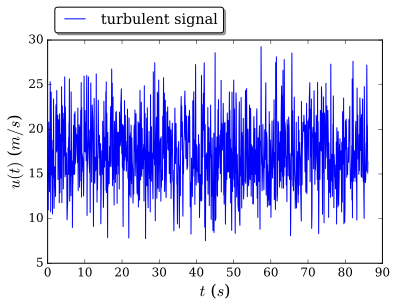

In [2]:
t, u, tmp = np.genfromtxt('data/p20_20.ts', delimiter='', unpack=True, dtype=float)
N = t.shape[0]
print('Number of samples: %6i'%N)
plt.plot(t[0:N:100],u[0:N:100], label=r"turbulent signal")

plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=1, shadow=True, fancybox=True)
plt.xlabel(r'$t$ ($s$)', fontdict = fontlabel)
plt.ylabel(r"$u(t)$ ($m/s$)", fontdict = fontlabel)
plt.show()

This signal of velocity as a function of time is shown with a downsampling of factor 100 to limit the toll on your computer. The directory 'data' contains similar velocity signals taken in a turbulent jet using Laser Doppler Velocimetry. Details can be found here:
http://ldvproc.nambis.de/data/ektdata.html

Here the boundary conditions are stationary or steady, meaning that the pumping rate of air into the nozzle is constant, there is no sudden change of temperature, moving walls in the room hosting the jet during the time needed for measurements. Under these conditions, we explore the dynamics of the signal with statistics.

<h2>Mean or Expectation</h2>
The signal was recorded over a duration $T$. The signal consists of $N$ samples. If the sampling frequency is constant, the mean velocity is
<p class = 'alert alert-danger'>
$$
\overline{u}=U=\frac{1}{T}=\int_0^Tu(t)dt=\frac{1}{N}\sum_{i=0}^{N-1}u(t_i)
$$
</p>
Here the measurement method is Laser Doppler Velocimetry, which does not record samples at a fixed frequency. The signal is therefore interpolated before using the numpy statistical functions.


Number of samples: 100000


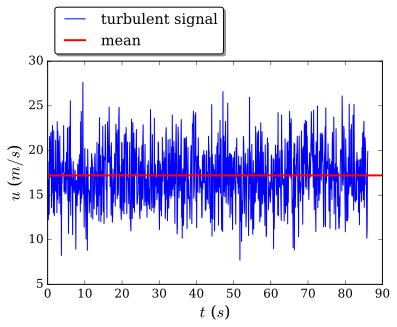

In [23]:
from scipy import interpolate

t_raw, u_raw, tmp = np.genfromtxt('data/p20_20.ts', delimiter='', unpack=True, dtype=float)
f = interpolate.interp1d(t_raw, u_raw)
N= 100000
t = np.linspace(t_raw[0],t_raw[len(t_raw)-1],N)
u = f(t)
print('Number of samples: %6i'%N)
plt.plot(t[0:N+1:100],u[0:N+1:100], label=r"turbulent signal")
um_plot = np.mean(u)*np.ones(2)
t_line_plot = np.array([0, 90.])
plt.plot(t_line_plot,um_plot,'r-',lw=2,label = r"mean")
plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=1, shadow=True, fancybox=True)
plt.xlabel('$t$ ($s$)', fontdict = fontlabel)
plt.ylabel('$u$ ($m/s$)', fontdict = fontlabel)
plt.show()

<h2>Fluctuations and Reynolds Decomposition</h2>
The velocity fluctuations are defined as
<p class = 'alert alert-danger'>
$$
u'(t) = u(t)-\overline{u}=u(t)-U
$$
</p>
which leads to the Reynolds decomposition of any quantity $a$:
<p class = 'alert alert-danger'>
$$
a(t)=\overline{a}+a'=A+a'
$$
</p>

<h2>Standard Deviation, Root-Mean-Squared, Turbulent Intensity and Variance</h2>

The standard deviation or root-mean-squared (RMS) measures how intense the turbulence is, or the amount of variation of fluctuations around the mean. The RMS definition  is
<p class = 'alert alert-danger'>
$$
u_{rms}=\sqrt{\frac{1}{T}\int_0^T\left(u(t)-\overline{u}\right)^2dt}=\sqrt{\overline{u'^2}}
$$
</p>
The turbulent intensity is the ratio of the RMS to the mean
<p class = 'alert alert-danger'>
$$
I(u)= \frac{u_{rms}}{U}
$$
</p>
and the variance is simply:
<p class = 'alert alert-danger'>
$$
var(u)=\overline{u'^2}
$$
</p>

In [24]:
print('mean velocity %3.2f m/s' %np.mean(u))
print('velocity standard deviation %3.2f m/s' %np.std(u))
u_rms = np.std(u)
Iu = np.std(u)/np.mean(u)
print('Turbulence intensity %3.2f ' %Iu)

mean velocity 17.21 m/s
velocity standard deviation 3.32 m/s
Turbulence intensity 0.19 


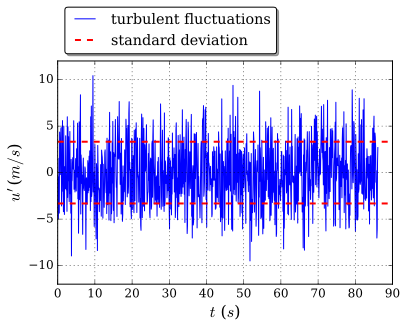

-6.70752342558e-16


In [25]:
uf = u - np.mean(u)
plt.plot(t[0:N+1:100],uf[0:N+1:100], label=r"turbulent fluctuations")
ustd_plot = np.std(u)*np.ones(2)
plt.plot(t_line_plot,ustd_plot,'r--',lw=2, label=r"standard deviation")
plt.plot(t_line_plot,-ustd_plot,'r--',lw=2)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=1, shadow=True, fancybox=True)
plt.xlabel('$t$ ($s$)', fontdict = fontlabel)
plt.ylabel("$u'$ ($m/s$)", fontdict = fontlabel)
plt.ylim(-12,12)
plt.grid(True)
plt.show()
print(np.mean(uf))

<h2>Probability Density Functions (PDF)</h2>

The PDF $P(u_o)$ is the probability of finding the value $u_o$ in the signal. Since we are dealing with discrete data rather than continuous, a PDF is defined by an interval $\Delta$ and $P(u)$ is the probability of finding samples within the interval $]u-\Delta,u+\Delta]$.

Here is the PDF of the velocity fluctuations compared to a normal distribution:

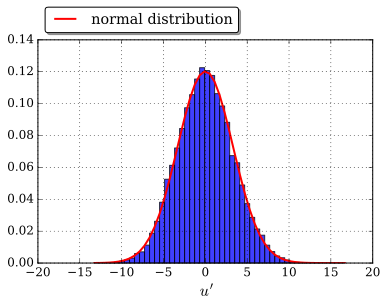

In [26]:
import matplotlib.mlab as mlab
n, bins, patches = plt.hist(uf, 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, np.mean(uf), np.std(uf))
plt.plot(bins, y, 'r-', linewidth=2, label = "normal distribution")
plt.xlabel(r"$u'$", fontdict = fontlabel)
plt.ylabel(r"$P(u')$",fontdict = fontlabel)
plt.grid(True)
plt.xlim(-20,20)
plt.ylabel(r"", fontdict = fontlabel)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=1, shadow=True, fancybox=True)

Here is now the PDF plotted as a function of $u'/u_{rms}$. The interval between $\pm u_{rms}$ contains about $75\%$ of the fluctuations.

mean of u': -6.708e-16, integral under the curve: 2.263e-05


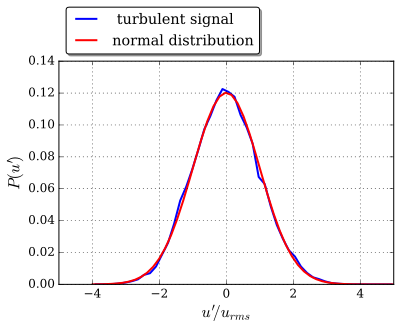

In [27]:
xbins = 0.5*(bins[1:] + bins[:-1])
#print(xbins)
plt.plot(xbins/u_rms,n, 'b-', lw = 2, label = r" turbulent signal")
plt.plot(bins/u_rms,y, 'r-', lw= 2, label = r"normal distribution" )
plt.xlabel(r"$u'/u_{rms}$", fontdict = fontlabel)
plt.ylabel(r"$P(u')$", fontdict = fontlabel)
plt.xlim(-5,5)
plt.grid(True)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=1, shadow=True, fancybox=True)
print("mean of u': %1.3e, integral under the curve: %1.3e" %(np.mean(uf),np.trapz((n+1e-9)*xbins**1,xbins)))

The PDF may be used to compute the statistical moments of the velocity fluctuations. The statiscal moment of order $n$ is defined as,
<p class = 'alert alert-danger'>
$$
\int_{-\infty}^{+\infty}u'^nP(u')du' = \overline{u'^n}
$$
</p>
Therefore

$$
\int_{-\infty}^{+\infty}u'^2P(u')du' = \overline{u'^2}
$$

is the variance. The skewness
<p class = 'alert alert-danger'>
$$
S(u') = \frac{\overline{u'^3}}{\left(\overline{u'^2}\right)^{3/2}}
$$
</p>
measures the asymmetry of the PDF. If $S$ is negative (positive), the PDF is skewed towards negative (positive) values. In most cases it means that large negative fluctuations are predominantly negative (positive). Since, 

$$
\overline{u'^3}=\overline{u'(u'^2)}
$$

which is the flux of the energy of the fluctuations $u'^2$ in the streamwise direction. Obviously, $S=0$ means that the PDF is symmetrical.

The flatness
<p class = 'alert alert-danger'>
$$
F(u') = \frac{\overline{u'^4}}{\left(\overline{u'^2}\right)^2}
$$
</p>
measures how flat ($F>3$) or narrow ($F<3$) is the PDF compared to a normal distribution $F=3$.

The following calculates the different moments:


In [28]:
print("Integral of the pdf: %1.4f" %np.trapz(n,xbins))

Integral of the pdf: 1.0000


mean of u': -6.708e-16, integral under the curve: 2.263e-05


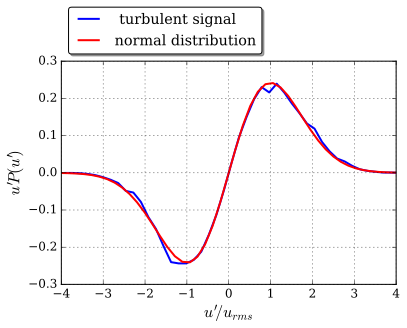

In [29]:
xbins = 0.5*(bins[1:] + bins[:-1])
#print(xbins)
plt.plot(xbins/u_rms,(n+1e-9)*xbins**1, 'b-', lw = 2, label = r" turbulent signal")
plt.plot(bins/u_rms,y*bins**1, 'r-', lw= 2, label = r"normal distribution" )
plt.xlabel(r"$u'/u_{rms}$", fontdict = fontlabel)
plt.ylabel(r"$u'P(u')$", fontdict = fontlabel)
plt.xlim(-4,4)
plt.grid(True)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=1, shadow=True, fancybox=True)
print("mean of u': %1.3e, integral under the curve: %1.3e" %(np.mean(uf),np.trapz((n+1e-9)*xbins**1,xbins)))

variance of u': 1.100e+01, integral under the curve: 1.103e+01


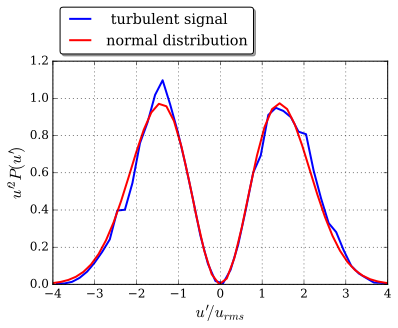

In [30]:
xbins = 0.5*(bins[1:] + bins[:-1])
#print(xbins)
plt.plot(xbins/u_rms,(n+1e-9)*xbins**2, 'b-', lw = 2, label = r" turbulent signal")
plt.plot(bins/u_rms,y*bins**2, 'r-', lw= 2, label = r"normal distribution" )
plt.xlabel(r"$u'/u_{rms}$", fontdict = fontlabel)
plt.ylabel(r"$u'^2P(u')$", fontdict = fontlabel)
plt.xlim(-4,4)
plt.grid(True)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=1, shadow=True, fancybox=True)
print("variance of u': %1.3e, integral under the curve: %1.3e" %(np.var(uf),np.trapz((n+1e-9)*xbins**2,xbins)))

skewness of u: 6.817e-02, integral under the curve: 6.940e-02


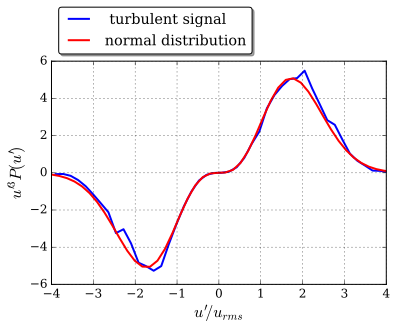

In [31]:
import scipy.stats as sc
xbins = 0.5*(bins[1:] + bins[:-1])
#print(xbins)
plt.plot(xbins/u_rms,(n+1e-9)*xbins**3, 'b-', lw = 2, label = r" turbulent signal")
plt.plot(bins/u_rms,y*bins**3, 'r-', lw= 2, label = r"normal distribution" )
plt.xlabel(r"$u'/u_{rms}$", fontdict = fontlabel)
plt.ylabel(r"$u'^3P(u')$", fontdict = fontlabel)
plt.xlim(-4,4)
plt.grid(True)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=1, shadow=True, fancybox=True)
print("skewness of u: %1.3e, integral under the curve: %1.3e" \
      %(sc.skew(uf),np.trapz((n+1e-9)*xbins**3,xbins)/np.power(np.var(uf),3/2)))

flatness of u: 2.951e+00, integral under the curve: 2.964e+00


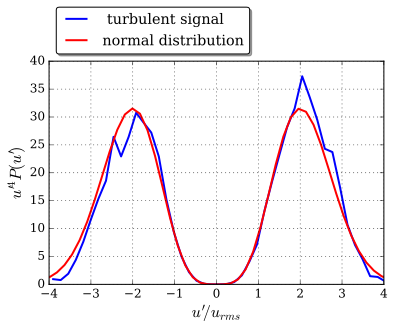

In [32]:
import scipy.stats as sc
xbins = 0.5*(bins[1:] + bins[:-1])
#print(xbins)
plt.plot(xbins/u_rms,(n+1e-9)*xbins**4, 'b-', lw = 2, label = r" turbulent signal")
plt.plot(bins/u_rms,y*bins**4, 'r-', lw= 2, label = r"normal distribution" )
plt.xlabel(r"$u'/u_{rms}$", fontdict = fontlabel)
plt.ylabel(r"$u'^4P(u')$", fontdict = fontlabel)
plt.xlim(-4,4)
plt.grid(True)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=1, shadow=True, fancybox=True)
print("flatness of u: %1.3e, integral under the curve: %1.3e" \
      %(sc.kurtosis(uf, fisher=False),np.trapz((n+1e-9)*xbins**4,xbins)/np.power(np.var(uf),2)))

super flatness of u: 1.421e+01, integral under the curve: 1.423e+01


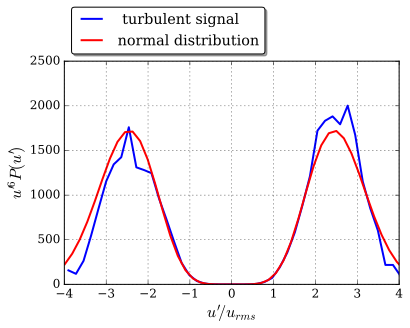

In [33]:
import scipy.stats as sc
xbins = 0.5*(bins[1:] + bins[:-1])
#print(xbins)
plt.plot(xbins/u_rms,(n+1e-9)*xbins**6, 'b-', lw = 2, label = r" turbulent signal")
plt.plot(bins/u_rms,y*bins**6, 'r-', lw= 2, label = r"normal distribution" )
plt.xlabel(r"$u'/u_{rms}$", fontdict = fontlabel)
plt.ylabel(r"$u'^6P(u')$", fontdict = fontlabel)
plt.xlim(-4,4)
plt.grid(True)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=1, shadow=True, fancybox=True)
print("super flatness of u: %1.3e, integral under the curve: %1.3e" \
      %(sc.moment(uf, moment = 6)/np.power(np.var(uf),3),np.trapz((n+1e-9)*xbins**6,xbins)/np.power(np.var(uf),3)))

<h2>Streamwise Decay of the Jet Centerline Velocity</h2>

From your fluid mechanics lab, you should know that the velocity in a turbulent jet decays as the inverse of the distance from the nozzle. The following cell confirms that this behavior for the present jet.

[ 0.11491425 -0.22177093]


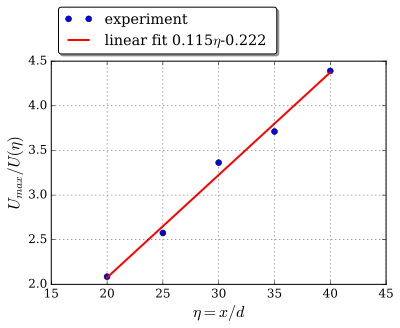

In [43]:
files = np.array(['data/p20_20.ts', 'data/p20_25.ts', 'data/p20_30.ts', \
                   'data/p20_35.ts', 'data/p20_40.ts'])
u_mean = np.zeros(5)
i = 0
for filename in files:
    t_raw, u_raw, tmp = np.genfromtxt(filename, delimiter='', unpack=True, dtype=float)
    f = interpolate.interp1d(t_raw, u_raw)
    N= 100000
    t = np.linspace(t_raw[0],t_raw[len(t_raw)-1],N)
    u = f(t)
    u_mean[i] = np.mean(u)
    i += 1
u_max = 35.9
xd = np.array([20, 25, 30, 35, 40])
plt.plot(xd,u_max/u_mean,'o',lw =2, label = r"experiment")
z = np.polyfit(xd,u_max/u_mean,1)
f = np.poly1d(z)
y_fit = f(xd)
plt.plot(xd,y_fit,'r-',lw =2, label = r"linear fit %1.3f$\eta$%1.3f " %(z[0],z[1]))
plt.xlabel(r"$\eta=x/d$", fontdict = fontlabel)
plt.ylabel(r"$U_{max}/U(\eta)$", fontdict = fontlabel)
plt.grid(True)
plt.xlim(15,45)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=1, shadow=True, fancybox=True)

plt.show
print(z)

<h2>Product of Fluctuations</h2>

<p class = "alert alert-danger">
By construction, $\overline{u'}=0$,
$$
\overline{u'}=\frac{1}{T}\int_0^Tu-\overline{u}dt=\frac{1}{T}\int_0^Tudt-\frac{1}{T}\int_0^T\overline{u}dt=\overline{u}-\overline{u}\frac{1}{T}\int_0^Tdt
$$
</p>
Now what could we anticipate for the average of the product of turbulent fluctuations?

We know already that in a turbulent flow $overline{u'^2}\neq0$, since it is the variance of the velocity fluctuations. In fact,
<p class = "alert alert-danger">
$$
k_t=\frac{1}{2}\left(\overline{u'^2}+\overline{v'^2}+\overline{w'^2}\right)
$$
is the <b>Turbulent Kinetic Energy (TKE)</b> of the flow.
</p>
In a turbulent flows, the cross product of velocity fluctuations are only zero under symmetry conditions. The organization of the flow is such that coherent structures, mostly vortices, generate non-zero products of velocity fluctuations.
